In [1]:
!pip install kneed

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = 'CustomerID') # Dropping the column named 'Customer ID'
X = X.replace({'Male': 0, 'Female': 1}) # Replace 'Male' and 'Female values with numbers

scaler = StandardScaler() #Initiate Scaling

X = pd.DataFrame(scaler.fit_transform(X), index = X.index, columns = X.columns)

X.head()

<ipython-input-7-fc0fb7fffde7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({'Male': 0, 'Female': 1})


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


<Axes: >

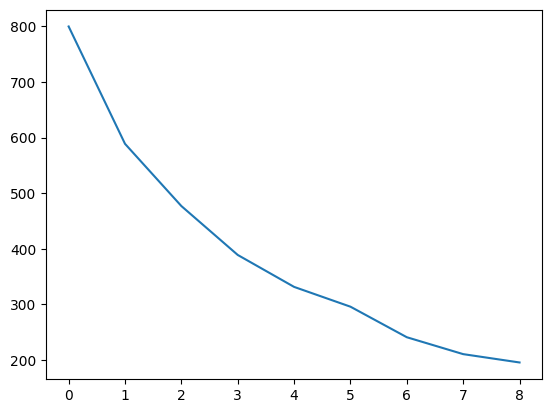

In [ ]:
from sklearn.cluster import KMeans

sse = []

for i in range (1,10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

sns.lineplot(data = sse)

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1,10), sse, curve="convex", direction="decreasing"
)

kl.elbow

4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
kmeans.cluster_centers_

array([[-1.12815215,  0.98044981, -0.04445407, -0.72822025],
       [ 0.88640526, -0.75047453, -0.00501655,  0.6979562 ],
       [ 0.88640526,  0.64256818, -0.09498735, -0.59494042],
       [-1.12815215, -0.80259081,  0.16692764,  0.56765749]])

In [ ]:
centres = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns = X.columns)
centres

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,52.511628,59.395349,31.441860
1,1.0,28.392857,60.428571,68.178571
2,1.0,47.803571,58.071429,34.875000
3,0.0,27.666667,64.933333,64.822222


In [ ]:
df['Cluster'] = kmeans.predict(X)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [ ]:
df.to_csv('Clustered customers.csv')